In [1]:
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
import sys
import json
from pprint import pprint
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from scipy.misc import imread
from text_preprocess import processTweet2,getStopWordList,replaceTwoOrMore
from textblob import TextBlob
import sys

In [2]:
class TwitterClient(object):
    '''
    Generic Twitter Class for sentiment analysis.
    '''
    def __init__(self):
        '''
        Class constructor or initialization method.
        '''
        # keys and tokens from the Twitter Dev Console
        consumer_key = 'UWvrjlCmbqN0BZoNo5taXZUva'
        consumer_secret = 'p4QwEe9ENbgrUGIezaRNpieI8DTCw0NbVgBZacLNXqD6GM9tyZ'
        access_token = '77678973-fYSD8juWLu42i8IcOAq1RyumwHORZMWDM4YGgQ3RO'
        access_token_secret = '7n08WCd0pu3D7IvJTNwALGEpEgrXjiaGKkVr7KrUit2w3'
 
        # attempt authentication
        try:
            # create OAuthHandler object
            self.auth = OAuthHandler(consumer_key, consumer_secret)
            # set access token and secret
            self.auth.set_access_token(access_token, access_token_secret)
            # create tweepy API object to fetch tweets
            self.api = tweepy.API(self.auth)
        except:
            print("Error: Authentication Failed")
            
            
    def get_tweets(self, query, count = 10):
        '''
        Main function to fetch tweets and parse them.
        '''
        # empty list to store parsed tweets
        tweets = []
 
        try:
            # call twitter api to fetch tweets
            fetched_tweets = self.api.search(q = query, count = count)
 
            # parsing tweets one by one
            for tweet in fetched_tweets:
                # empty dictionary to store required params of a tweet
                parsed_tweet = {}
 
                # saving text of tweet
                parsed_tweet['text'] = tweet.text
                # saving sentiment of tweet
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)
 
                # appending parsed tweet to tweets list
                if tweet.retweet_count > 0:
                    # if tweet has retweets, ensure that it is appended only once
                    if parsed_tweet not in tweets:
                        tweets.append(parsed_tweet)
                else:
                    tweets.append(parsed_tweet)
 
            # return parsed tweets
            return tweets
 
        except tweepy.TweepError as e:
            # print error (if any)
            print("Error : " + str(e))
            
    def clean_tweet(self, tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
 
    def get_tweet_sentiment(self, tweet):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(self.clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'

In [3]:
search_twitter_term = "tcsarday" #"CTS"

In [10]:
# creating object of TwitterClient Class
api = TwitterClient()
# calling function to get tweets
tweets = api.get_tweets(query = search_twitter_term, count = 2000)

In [11]:
for tweet in tweets:
    print(tweet)

{'text': 'RT @vernonxt: Regu,VP/Global Head IoT @TCS identified biggest challenge is to realize the exponential biz value  #TcsARday. A bit like Turn…', 'sentiment': 'neutral'}
{'text': 'RT @GaryB_NH: .@TCS #TCSARDay a key differentiator incl #Innovation &amp; #Engagement Platforms incl Innovation forums, idea jams, hackathons,…', 'sentiment': 'neutral'}
{'text': 'RT @RalphRio: " #blockchain is applied by @TCS to secure the #SupplyChain " Surya Kant @tcs_na  #tcsarday https://t.co/FlHGibW2QG', 'sentiment': 'positive'}
{'text': 'RT @RalphRio: Surya Kant @tcs_na extends #business40 to include #cloud, #ArtificialIntelligence &amp; #automation during #tcsarday https://t.co…', 'sentiment': 'neutral'}
{'text': 'RT @dschubmehl: PR Krishnan of TCS shows the future of Intelligent Enterprise Automation per TCS #TCSARDay https://t.co/IceZK0TGeQ', 'sentiment': 'positive'}
{'text': 'RT @rbharath: Regu A, VP TCS and Head IoT speaks of IoTs role in Business 4.0 following a video on TCS own energy sav

In [13]:
from random import randint
i = randint(1, len(tweets)) # For getting a random tweet from the data 
print('\033[1m'+"Tweet number : " + str(i) + '\033[0m' + "\n")
print('\033[1m'+"Original tweet : "+'\033[0m')
print(tweets[i]["text"].encode(sys.stdout.encoding, errors='replace'))    
print('\033[1m'+"Processed tweet :" + '\033[0m')
print(replaceTwoOrMore(re.sub('[^a-zA-Z0-9 \n\.]', ' ', processTweet2(tweets[i]["text"]))).encode(sys.stdout.encoding, errors='replace'))


Tweet number : 12

Original tweet : 
b'RT @nishaSY: #TCSARDay converting channel entropy challenges to consistency, being on channel of choice of consumer - @gluecode #digitalInt\xe2\x80\xa6'
Processed tweet :
b'rt tcsarday converting channel entropy challenges to consistency  being on channel of choice of consumer  digitalint '


In [14]:
STOPWORD_customized = {'rt','amp','tcs','http'}
from nltk.corpus import stopwords 
import string
stop = set(stopwords.words('english'))

In [15]:
words=' '
for i in range (0,len(tweets)):
    temp = replaceTwoOrMore(re.sub('[^a-zA-Z0-9 \n\.]', ' ', processTweet2(tweets[i]["text"])))
    temp = " ".join([i for i in temp.lower().split() if i not in stop])
    temp = " ".join([i for i in temp.split() if i not in STOPWORD_customized])
    shortword = re.compile(r'\W*\b\w{1,2}\b')
    temp = shortword.sub('', temp)    
    words = words + temp  

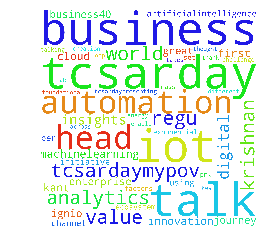

In [16]:
wordcloud = WordCloud(
    #font_path='Xerox Sans Serif Wide Bold Oblique.ttf',
    #stopwords=STOPWORDS.union(stopword),
    background_color='white',
    #mask = logomask,
    max_words=50,
    width=4000,
    height=4000
).generate(words)

plt.imshow(wordcloud.recolor(random_state=3))
plt.axis('off')
#plt.savefig('./tweetcloud.png', dpi=300)
plt.show()